<a href="https://colab.research.google.com/github/LohithVarun/DSA0615-DataHandlingAndVisualization/blob/main/Analytical%20Programs/Day_3_AnalyticalPrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 3

11) Create a network diagram or heatmap where each item is represented by a node, and the strength of association (e.g., lift value) is represented by the thickness of edges or color intensity. Interpretation involves identifying item pairs with high lift values, indicating strong associations between products frequently purchased together.


---



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                        rhs                   support confidence    coverage      lift count
[1]  {liquor,                                                                                       
      red/blush wine}        => {bottled beer}    0.001931876  0.9047619 0.00213

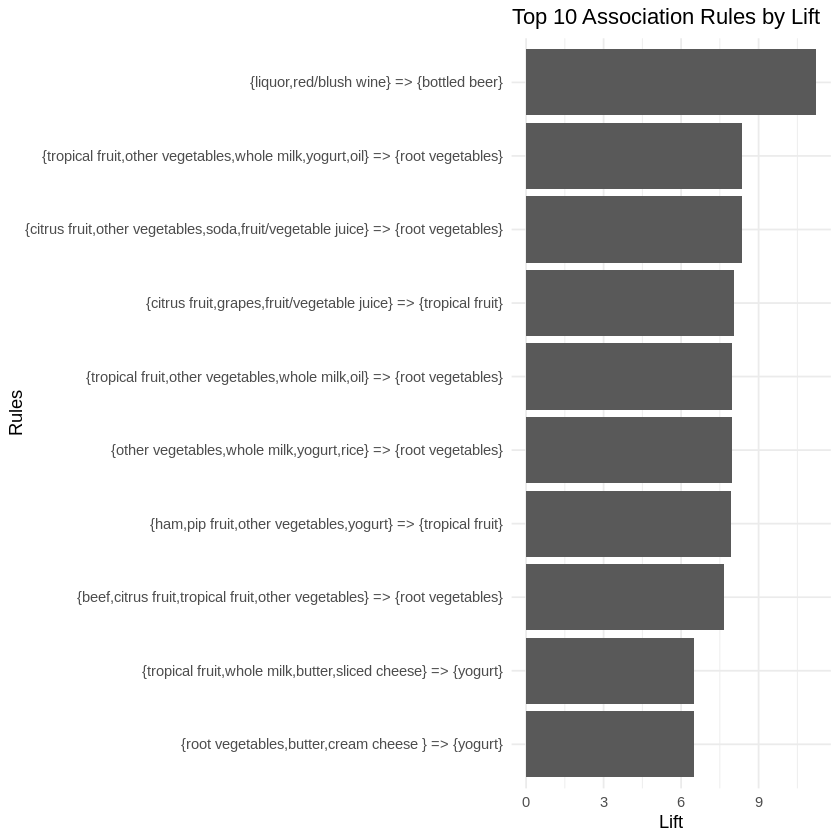

In [ ]:
library(arules)
library(tidyverse)

data("Groceries")
rules <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8))

top_rules <- head(sort(rules, by = "lift"), 10)
rules_df <- as(top_rules, "data.frame")

ggplot(rules_df, aes(x = reorder(rules, lift), y = lift)) +
  geom_col() +
  coord_flip() +
  labs(title = "Top 10 Association Rules by Lift",
       x = "Rules", y = "Lift") +
  theme_minimal()

print(inspect(top_rules))

12) Create a bar chart or line chart where each segment represents a customer cohort or segment, and the height or trend line represents the estimated CLV. Interpretation involves identifying segments with high CLV and focusing marketing efforts on acquiring similar high-value customers.

---



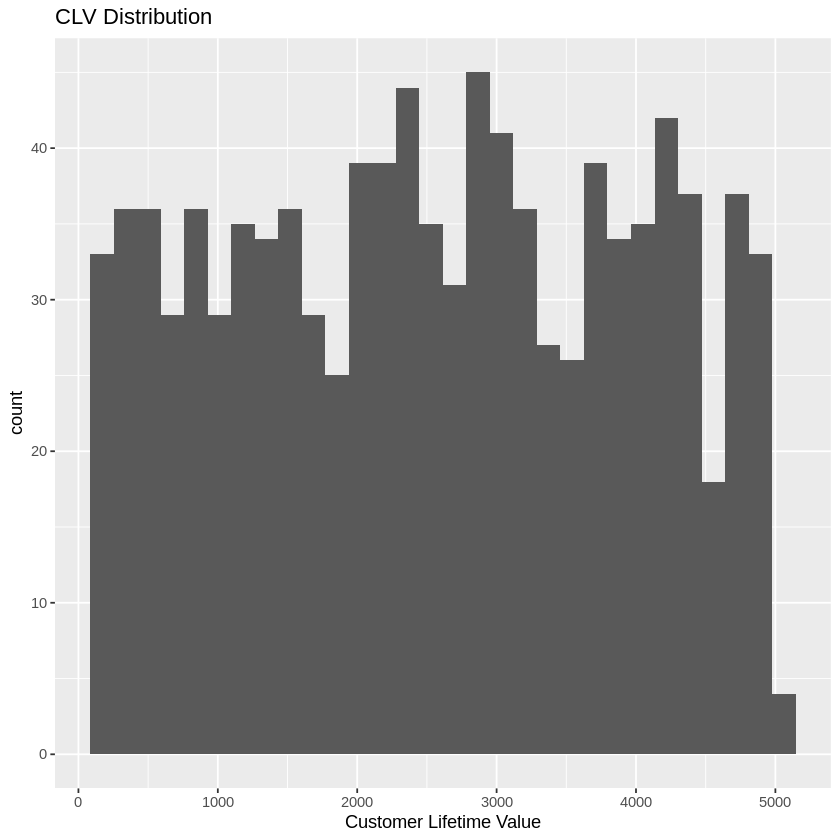

In [ ]:
library(ggplot2)

customers <- data.frame(
  clv = runif(1000, 100, 5000)
)

ggplot(customers, aes(x = clv)) +
  geom_histogram(bins = 30) +
  labs(title = "CLV Distribution", x = "Customer Lifetime Value")

13) Create a network graph where each user is represented as a node, and interactions (e.g., follows, likes) are represented as edges between nodes. Use node size or color to indicate centrality metrics. Interpretation involves identifying key influencers or communities based on network structure and centrality measures.


---



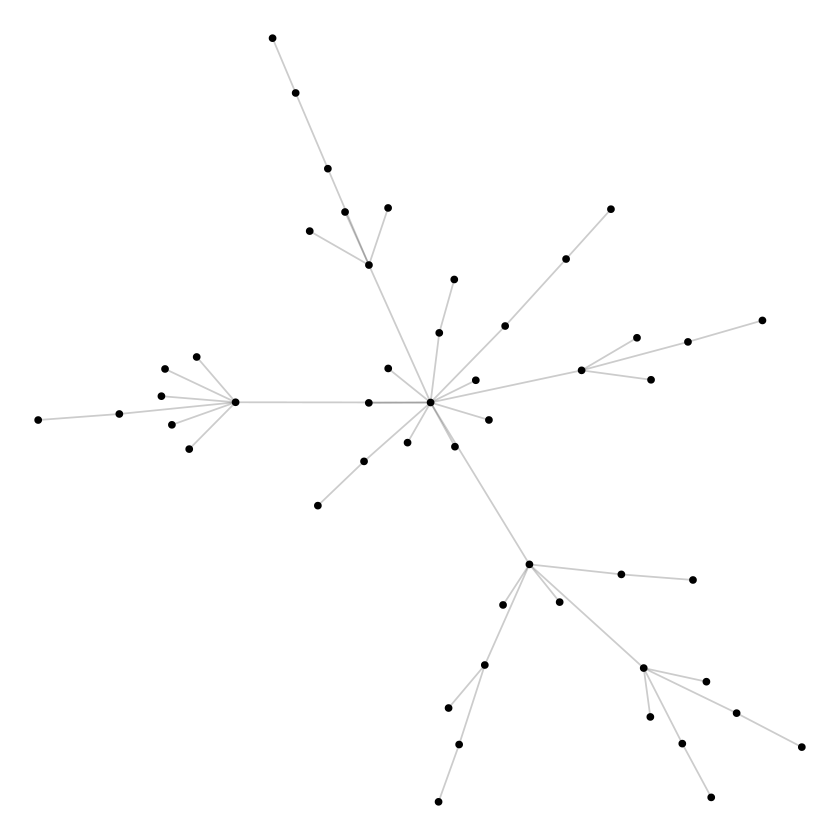

In [ ]:
library(igraph)
library(ggraph)

g <- sample_pa(50)
ggraph(g, layout = "fr") +
  geom_edge_link(alpha = 0.2) +
  geom_node_point() +
  theme_void()

14) Create a line chart or stacked area chart where sentiment scores (e.g., proportion of positive reviews) are plotted over time or compared across different products/brands. Use color coding or annotations to differentiate sentiments. Interpretation involves identifying trends in sentiment (e.g., improving or declining sentiment) and comparing sentiment levels across products or brands.


---



Joining with `by = join_by(word)`


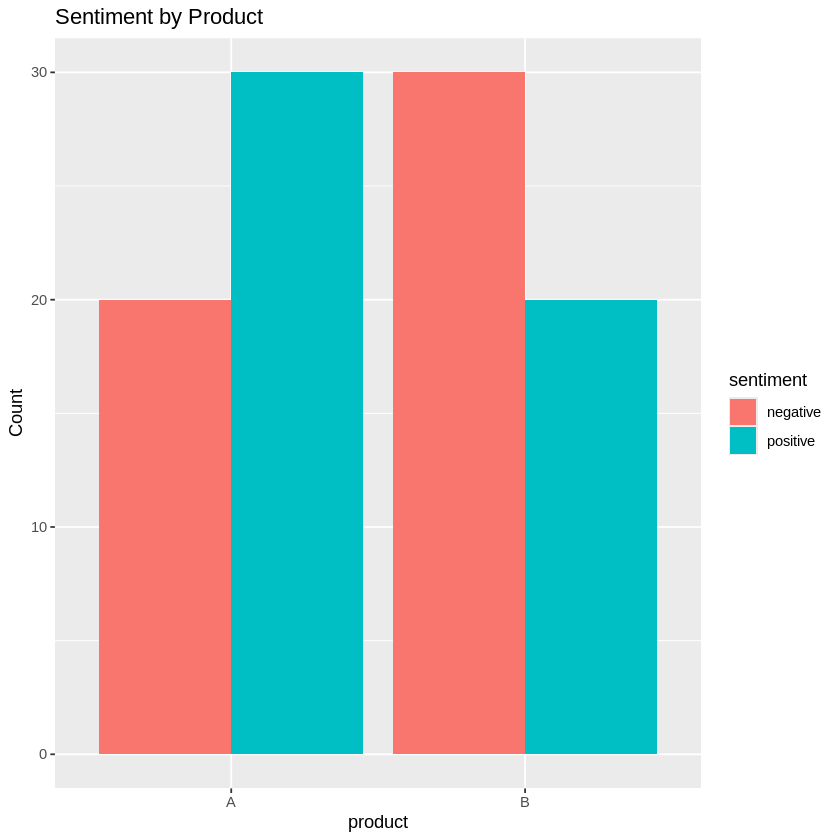

In [ ]:
library(tidytext)
library(dplyr)
library(ggplot2)

reviews <- data.frame(
  product = rep(c("A", "B"), each = 50),
  text = c(rep("great", 30), rep("bad", 20), rep("great", 20), rep("bad", 30))
)

sentiment <- reviews %>%
  unnest_tokens(word, text) %>%
  inner_join(get_sentiments("bing")) %>%
  count(product, sentiment)

ggplot(sentiment, aes(product, n, fill = sentiment)) +
  geom_col(position = "dodge") +
  labs(y = "Count", title = "Sentiment by Product")

15) Create a choropleth map where regions or store locations are shaded or colored based on sales revenue or customer density. Use graduated symbols or heat maps to visualize intensity levels. Interpretation involves identifying hotspots or clusters of high sales performance and understanding geographic patterns in customer distribution.

---



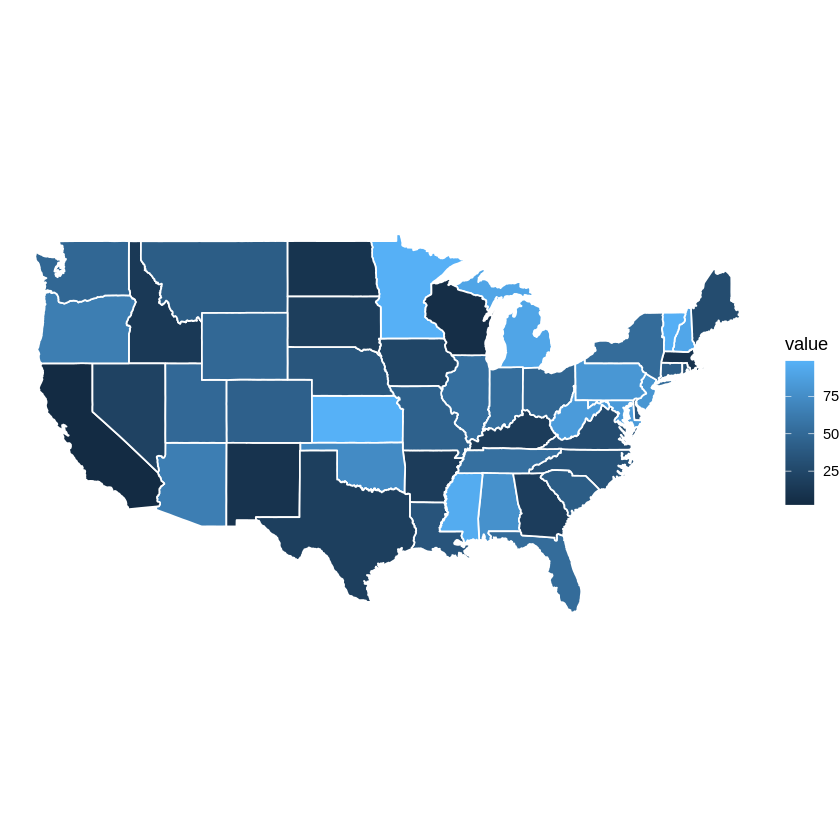

In [ ]:
library(ggplot2)
library(maps)

us_states <- map_data("state")
state_data <- data.frame(
  region = tolower(state.name),
  value = runif(50, 1, 100)
)

map_data <- left_join(us_states, state_data, by = "region")

ggplot(map_data, aes(long, lat, group = group, fill = value)) +
  geom_polygon(color = "white") +
  theme_void() +
  coord_map()